In [6]:
import matplotlib.pyplot as plt
import cv2 as cv

from keras.preprocessing.image import ImageDataGenerator

In [7]:
img_gen = ImageDataGenerator(rotation_range=30,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1/255,
                            zoom_range=0.2,
                            horizontal_flip=True)

In [8]:
train_img_gen = img_gen.flow_from_directory('PetImages',
                                           target_size=(100,100))

Found 24997 images belonging to 2 classes.


In [9]:
train_img_gen.class_indices

{'Cat': 0, 'Dog': 1}

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (100,100,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 2, activation = "sigmoid"))

In [12]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 76832)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 153666    
Total params: 154,562
Trainable params: 154,562
Non-trainable params: 0
_________________________________________________________________


In [14]:
results = model.fit(train_img_gen, epochs=20)

Epoch 1/20
707/782 [==========================>...] - ETA: 22s - loss: 0.7363 - accuracy: 0.5802

C:\Users\Mhuggi\anaconda3\envs\opencv\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
C:\Users\Mhuggi\anaconda3\envs\opencv\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
C:\Users\Mhuggi\anaconda3\envs\opencv\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
C:\Users\Mhuggi\anaconda3\envs\opencv\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
C:\Users\Mhuggi\anaconda3\envs\opencv\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warn

782/782 [==============================] - 238s 303ms/step - loss: 0.7285 - accuracy: 0.5846
Epoch 2/20
782/782 [==============================] - 98s 125ms/step - loss: 0.6008 - accuracy: 0.6828
Epoch 3/20
782/782 [==============================] - 97s 124ms/step - loss: 0.5887 - accuracy: 0.6958
Epoch 4/20
782/782 [==============================] - 98s 125ms/step - loss: 0.5816 - accuracy: 0.6991
Epoch 5/20
782/782 [==============================] - 98s 125ms/step - loss: 0.5771 - accuracy: 0.7094
Epoch 6/20
782/782 [==============================] - 97s 125ms/step - loss: 0.5715 - accuracy: 0.7041
Epoch 7/20
782/782 [==============================] - 98s 125ms/step - loss: 0.5686 - accuracy: 0.7068
Epoch 8/20
782/782 [==============================] - 98s 125ms/step - loss: 0.5607 - accuracy: 0.7145
Epoch 9/20
782/782 [==============================] - 98s 125ms/step - loss: 0.5630 - accuracy: 0.7147
Epoch 10/20
782/782 [==============================] - 98s 125ms/step - loss: 0.562

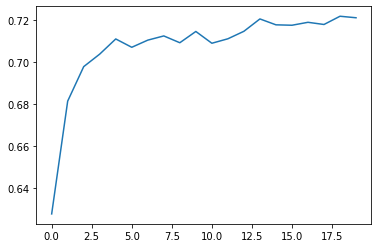

In [15]:
plt.plot(results.history['accuracy'])

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
test_img = 'media/luna2.jpg'
test_img = image.load_img(test_img, target_size=(100,100))
test_img = image.img_to_array(test_img)

test_img = np.expand_dims(test_img, axis=0)
test_img = test_img/255

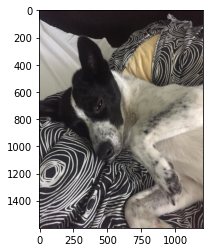

In [53]:
import matplotlib.image as mpimg
img = mpimg.imread('media/luna2.jpg')
plt.imshow(img)

In [54]:
prob = model.predict(test_img)
prob

array([[0.02916154, 0.973101  ]], dtype=float32)

In [55]:
print("Cat:" + str(prob[0][0]))
print("Dog:" + str(prob[0][1]))

Cat:0.029161543
Dog:0.973101
